In [15]:
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pylab as plt
import matplotlib as mlp
import numpy as np
%matplotlib inline 

In [3]:
data = pd.read_csv('data/csv/result.csv')

In [4]:
data.count()

id            606
created_at    606
user_id       606
user_name     606
tweet_text    606
url           606
dtype: int64

In [5]:
#Extracting	features from the	training dataset	using a sparse vectorizer
t = time()
vectorizer = TfidfVectorizer(min_df=1, max_df=.5, max_features=10000, stop_words='english', use_idf=True)
X = vectorizer.fit_transform(data["tweet_text"])
print "done	in	%fs" % (time() - t)
print "n_samples: %d, n_features: %d" % X.shape
print

done	in	0.139454s
n_samples: 606, n_features: 2377



In [6]:
#Kmean clustering
km = KMeans(n_clusters=7, init='k-means++', max_iter=100, n_init=1, verbose=1)
print "Clustering sparse data with %s" % km
t = time()
km.fit(X)
print "done in %0.3fs" % (time() - t)

Clustering sparse data with KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=7, n_init=1,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=1)
Initialization complete
Iteration  0, inertia 1099.076
Iteration  1, inertia 552.924
Iteration  2, inertia 550.776
Iteration  3, inertia 548.764
Iteration  4, inertia 547.518
Iteration  5, inertia 545.091
Iteration  6, inertia 543.861
Iteration  7, inertia 543.151
Iteration  8, inertia 542.757
Iteration  9, inertia 541.573
Iteration 10, inertia 541.242
Iteration 11, inertia 541.214
Converged at iteration 11
done in 0.056s


In [7]:
print "Top terms per cluster:"
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(7):
    print "Cluster %d:" % i
    text = ' '
    for ind in order_centroids[i, :20]:
        text = text + '%s' % terms[ind] + ' '
    print text

Top terms per cluster:
Cluster 0:
 rt new post blog la scaling dot yfyle2qw2v soundness odersky java developer di akka london della job al http amp 
Cluster 1:
 functional data going languages y4vxfcdxbq conquered world big scalafriends rt programming structures purely clojure men dogs infoworld qcon complicated d6y 
Cluster 2:
 scalarx paseo pequeño iqhjalzyrg d7jwwq8cxo por scalerablog rt 추가했습니다 fishnet fjkkbpbboq fizcoiu42x fiwy6v9iht fit finch flagellum filosofia filmtekercs film file 
Cluster 3:
 functionalprogramming infoworld clojure amp discusses richhickey reduces complexity incidental cognitect p3i rt luciano pavarotti 1967 sings cinemas coming mhjcrrhupi lkfet05d 
Cluster 4:
 spark code software v8uhpao9pt cloudcomputing tendencias2016 php7 webcomponents bigdata java osktcz48fr hadoop singleton redis typing trying run developers spa engineer 
Cluster 5:
 1904 butterfly milan premieres madame la italy theatre thisdayinhistory history eoay185yeb puccini madama rt premiered tea

In [68]:
order_centroids

array([[1748, 1359, 1547, ...,  532, 1632,  694],
       [ 826,  574,  875, ..., 1569, 1568,    0],
       [1806, 1476, 1493, ..., 1581, 1580,    0],
       ..., 
       [1921,  474, 1901, ..., 1556, 1555,    0],
       [  32,  387, 1284, ..., 1572, 1571,    0],
       [ 230, 1570, 1285, ..., 1576, 1575,    0]])

In [116]:
#Multi-Dimensional Scaling
# X = np.array(X)
dist = cosine_similarity(X)
# print dist
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a',
4: '#66a61e', 5: '#9990b3', 6: '#e8888a'}
#convert to label from index cluster if know after use k-means algorithm
cluster_names = {   
                    0: '0', 
                    1:'1',
                    2:'2',
                    3:'3',
                    4:'4',
                    5:'5',
                    6:'6'
                }
df = pd.DataFrame(dict(x=xs, y=ys, label=km.labels_, txt=data["tweet_text"]))

In [124]:
index_start = 100
index_end = 150
df_temp = df[index_start:index_end]
print 'list cluster in sample df: ' + str(map(lambda x: x[0],pd.unique(df_temp[['label']].values)))
df_temp[['label','txt']][:10]


,label,txt
100,0,Great article explaining what #functionalprogr...
101,0,"Caso #Scala atentado provocado por el estado,q..."
102,0,Calling all #PPGAMECHANGERS Application Engine...
103,5,...on this day in 1904 Giacomo Puccini's 'Mada...
104,4,Scala code to access documents in AWS S3 bucke...
105,0,Top boy @BRyderJones doing his thing onstage l...
106,0,Filmtekercs: Óda egy operaházhoz – A művészet ...
107,0,RT @GianniniRoberto: Pearls of italian psych b...
108,0,SBT Question:\n\nhttps://t.co/OuDFH92XaA says ...
109,0,SBT Question:\n\nhttps://t.co/OuDFH92XaA says ...


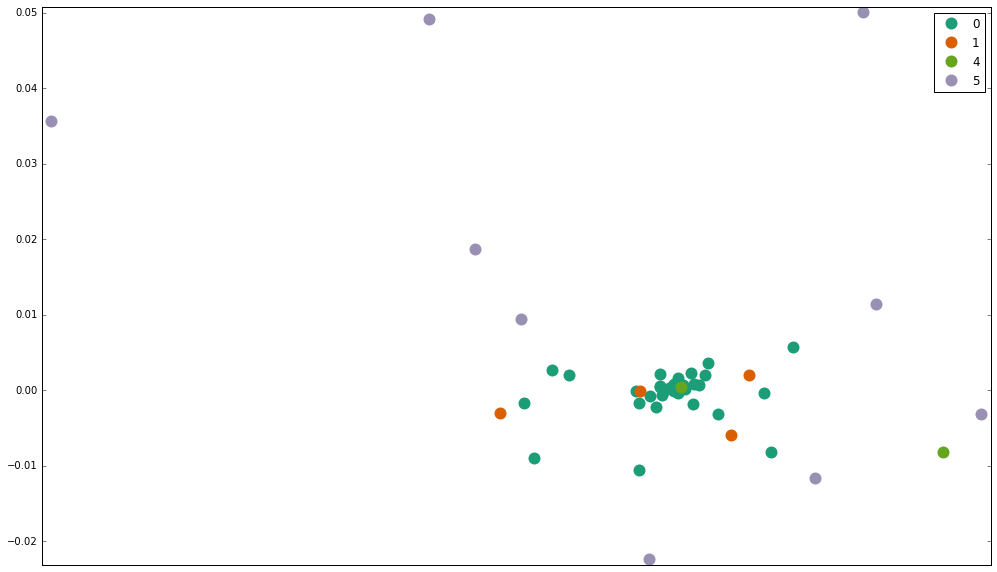

In [126]:
import sys 
reload(sys) 
sys.setdefaultencoding("utf-8")
groups = df.groupby('label')
groups_temp = df_temp.groupby('label')
fig,ax = plt.subplots(figsize=(17,10))
ax.margins(.01)

for name, group in groups_temp:
    ax.plot(group.x,group.y, marker='o',linestyle='', ms=12, label=cluster_names[name]
            ,color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis = 'x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y' ,which='both',bottom='off',top='off',labelbottom='off')

ax.legend(numpoints=1)

# for i in range(index_start,index_end):
#     ax.text(df_temp.ix[i]['x'],df_temp.ix[i]['y'],df_temp.ix[i]['txt'],size=10)

plt.show()